In [37]:
import requests
from bs4 import BeautifulSoup
import datetime
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [2]:
# Constants
News_URL = "https://www.prnewswire.com/news-releases/news-releases-list/?"
#News_URL = "https://www.prnewswire.com/news-releases/news-releases-list/?month=11&day=24&year=2021&hour=00&page=1&pagesize=100"

Total_Days = 7 #Number of days to fetch
StockSymbol_Required = 2

In [3]:
# Global Variables
arr_Date = []
arr_newsTitle = []
arr_newsPara = []
arr_newsUrl = []

In [39]:
# Date for extracting webpage
currentDate = datetime.datetime.now()
tempDate = currentDate
stockPeriod = 60
strEndDate = datetime.date.strftime(currentDate, "%Y-%m-%d")
strStartDate = datetime.date.strftime(currentDate - datetime.timedelta(days=stockPeriod), "%Y-%m-%d")

In [5]:
def prepare_URL(dayToFetch) -> str:
   urlByDay = News_URL + 'month=' + str(currentDate.month) + '&day=' + str(dayToFetch) + '&year=' + str(currentDate.year) + '&hour=00&page=1&pagesize=100'
   return urlByDay

In [6]:
def parse_News(forDay):
  url = prepare_URL(forDay)
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")

  # to extract main layout content
  main = soup.find_all('main',class_='headline-listing')

  for elements in main:
    lstContainer = elements.find_all('section',class_='container')
    for mainHead in lstContainer:
      row = mainHead.find_all('div',class_='row')
      for mainCol in row:
        rowList = mainCol.find_all('div',class_='col-md-8 col-sm-8 card-list card-list-hr')
        for newsCard in rowList:
          newsLst = newsCard.find_all('a',class_='newsreleaseconsolidatelink')
          for content in newsLst:
            href = content.get('href')
            small = content.h3.small.text
            content.h3.small.decompose()
            h3 = content.h3.text.replace("\n", "")
            p =  content.p.text
            arr_Date.append(small)
            arr_newsTitle.append(h3)
            arr_newsPara.append(p)
            arr_newsUrl.append(href)

In [7]:
#Fetch & Parse data of last week
i = 0
while i < Total_Days:
  parse_News(currentDate.day - i)
  i = i + 1

In [8]:
# Write data to csv
dictNews = {'Date': arr_Date, 'Title': arr_newsTitle, 'Content': arr_newsPara, 'Url': arr_newsUrl}
df = pd.DataFrame(dictNews)
df.to_csv('newsData.csv')

df.head()

,Date,Title,Content,Url
0,"Dec 03, 2021, 23:40 ET",Taoyuan Forest International Tourism Resort of...,Taoyuan Forest International Tourism Resort wa...,/news-releases/taoyuan-forest-international-to...
1,"Dec 03, 2021, 23:06 ET","IFF 2021: Weltwirtschaft wächst 2021 um 5,9 % ...",Das Internationale Finanzforum (IFF) hat heute...,/news-releases/iff-2021-weltwirtschaft-wachst-...
2,"Dec 03, 2021, 23:06 ET","IFF 2021: la economía global crecerá un 5,9 % ...",El Foro Internacional de Finanzas (IFF) public...,/news-releases/iff-2021-la-economia-global-cre...
3,"Dec 03, 2021, 23:06 ET","IFF 2021: economia global crescerá 5,9% em 202...",O Fórum Internacional de Finanças (IFF) lançou...,/news-releases/iff-2021-economia-global-cresce...
4,"Dec 03, 2021, 23:06 ET",2021 IFF: Global Economy to Grow 5.9% in 2021 ...,International Finance Forum (IFF) today releas...,/news-releases/2021-iff-global-economy-to-grow...


In [9]:
#given a list of  few popular stock exchanges, user inputs one specific industry.
print(" 1.NYSE (New York Stock Exchange) \n 2.TSX (Toronto Stock Exchange) \n 3.NASDAQ ( National Association of Securities Dealers Automated Quotation)  ")
choice = int(input("Please enter the respective number for choosing  a specific stock exchange from the above list: "))



 1.NYSE (New York Stock Exchange) 
 2.TSX (Toronto Stock Exchange) 
 3.NASDAQ ( National Association of Securities Dealers Automated Quotation)  
Please enter the respective number for choosing  a specific stock exchange from the above list: 1


In [10]:
#searching the stock exchanges from the news dataframe 
stock_ex = { 1 : 'NYSE', 2:'TSX',3:'NASDAQ'}

In [11]:
StockIndustry_Search = stock_ex[choice]
print(StockIndustry_Search)

NYSE


In [12]:
#Search stock symbols of given industry

searchString = StockIndustry_Search + ': ([a-zA-Z]+)'
df_stockSymbols = df['Content'].str.extract(searchString, expand=False)

# Dropping the duplicates 
df_stockSymbols = df_stockSymbols.drop_duplicates()

# Dropping the missing values.
df_stockSymbols = df_stockSymbols.dropna() 

In [13]:
df_stock_list = df_stockSymbols

df_stock_list = df_stock_list.head(5)
df_stock_list

31     JNJ
32     LMT
40    HMLP
60    ATMR
64     AES
Name: Content, dtype: object

In [14]:
#picking up the latest 5 stocks from the entire stock list
stocks = df_stock_list.tolist()
stocks

['JNJ', 'LMT', 'HMLP', 'ATMR', 'AES']

In [15]:
for i, item in enumerate(stocks, start=1):
    print(i,item)
print("Please enter the respective number for choosing two stocks from the above list: ")
    
a,b=map(int,input().split())


1 JNJ
2 LMT
3 HMLP
4 ATMR
5 AES
Please enter the respective number for choosing two stocks from the above list: 
1 2


In [16]:
print (a) 
print (b) 

1
2


In [17]:
#creating dictionary to map the choice for particular stocks
stocks_list = { i : stocks[i-1] for i in range(1, len(stocks)+1 ) }

In [18]:
stocks_list

{1: 'JNJ', 2: 'LMT', 3: 'HMLP', 4: 'ATMR', 5: 'AES'}

In [19]:
#printing first stock
stock1=stocks_list[a]
stock1

'JNJ'

In [20]:
#printing second stock
stock2=stocks_list[b]
stock2

'LMT'

In [21]:
selected_stock = (stock1,stock2)

In [22]:
selected_stock

('JNJ', 'LMT')

#Yahoo Finance API


In [23]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=33fe1ea4a9d68ee69553ba0fdba5316f261a48dceee111150ea33c9cde175695
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [24]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [25]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
#Get stock details for the 2 symbols for specific period
stock_df = yf.download(selected_stock, 
                      start=strStartDate, 
                      end=strEndDate, 
                      progress=False,
)
stock_df.head()

**Stock price comparison**

In [ ]:
df = stock_df['Close']
ax = df.plot(title='Stock Price', fontsize=12, figsize=(20, 10))
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

**Stock's Volume Comparison**

In [ ]:
df = stock_df['Volume']
axis = df.plot(title='Stock Volume', fontsize=12, figsize=(20, 10))
axis.set_xlabel("Date")
axis.set_ylabel("Volume")

# to remove scientific notation from matplotlib
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
yahoo_financials = YahooFinancials(selected_stock[0])
data = yahoo_financials.get_historical_price_data(start_date=strStartDate, 
                                                  end_date=strEndDate, 
                                                  time_interval='daily')
stock1_df = pd.DataFrame(data[selected_stock[0]]['prices'])
stock1_df = stock1_df.drop('date', axis=1).set_index('formatted_date')

In [ ]:
yahoo_financials = YahooFinancials(selected_stock[1])
data=yahoo_financials.get_historical_price_data(strStartDate, strEndDate, "daily")
stock2_df = pd.DataFrame(data[selected_stock[1]]['prices'])
stock2_df = stock2_df.drop('date', axis=1).set_index('formatted_date')
stock2_df.head()

In [77]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Creating a new Dataframe and Training data

In [126]:
# Get Data for 5 yrs for 1st Stock
yahoo_financials = YahooFinancials(selected_stock[0])
data = yahoo_financials.get_historical_price_data(start_date='2017-12-4', 
                                                  end_date=strEndDate, 
                                                  time_interval='daily')
stockPredict_df = pd.DataFrame(data[selected_stock[0]]['prices'])
stockPredict_df = stockPredict_df.drop('date', axis=1).set_index('formatted_date')

In [149]:
# 1. Filter out the closing market price data
close_data = stockPredict_df.filter(['close'])

# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training x and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

Building LSTM Mode

In [143]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

Testing the model on testing data

In [145]:
# Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)


Error Calculation

In [146]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

160.7602695620177


Make Predictions

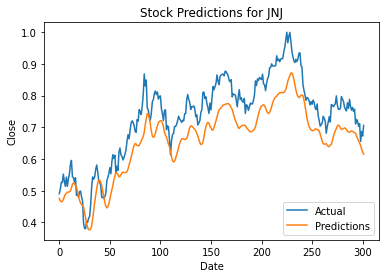

In [156]:
#train = pd.DataFrame(scaled_data[:training_data_len], columns=['close'])
valid = scaled_data[training_data_len:]

predictDF = pd.DataFrame(valid, columns=['close'])
predictDF['Predictions'] = predictions

title = 'Stock Predictions for ' + selected_stock[0]
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(predictDF['close'])
#plt.plot(predictDF[['close', 'Predictions']])
plt.plot(predictDF[['Predictions']])
 
plt.legend(['Actual', 'Predictions'], loc='lower right')
 
plt.show()